## Hotel Reviews Classifier Using Bidirectional LSTM



In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('All_reviews.csv')

In [3]:
df.head()

,All_Review,Reviewer_Score
0,angry made post available via possible site us...,0.0
1,negative real complaint hotel great great loca...,2.0
2,room nice elderly bit difficult room two story...,2.0
3,room dirty afraid walk barefoot floor looked c...,0.0
4,booked company line showed picture room though...,2.0


In [4]:
df["Reviewer_Score"].value_counts(dropna = False)

2.0    474447
1.0     30479
0.0     10812
Name: Reviewer_Score, dtype: int64

In [5]:
###Drop Nan Values
df=df.dropna()
df_neagitive = df[df["Reviewer_Score"] == 0]
df_neutral = df[df["Reviewer_Score"]== 1][:11000]
df_positive = df[df["Reviewer_Score"]== 2][:11000]
df = pd.concat([df_neagitive, df_neutral, df_positive], axis = 0)
df.head()

,All_Review,Reviewer_Score
0,angry made post available via possible site us...,0.0
3,room dirty afraid walk barefoot floor looked c...,0.0
21,room overrated disaster room dirty smelly hot ...,0.0
42,hotel going major construction renovation ment...,0.0
44,service awful refused take ownership mistake p...,0.0


In [6]:
df.tail()

,All_Review,Reviewer_Score
12347,negative upper level redone room clean tidy fr...,2.0
12348,negative food service,2.0
12349,negative clean comfortable good location,2.0
12350,little bit far tube station perfect visit frie...,2.0
12351,internet work room good location sadlers well ...,2.0


In [7]:
df.reset_index(drop = True)

,All_Review,Reviewer_Score
0,angry made post available via possible site us...,0.0
1,room dirty afraid walk barefoot floor looked c...,0.0
2,room overrated disaster room dirty smelly hot ...,0.0
3,hotel going major construction renovation ment...,0.0
4,service awful refused take ownership mistake p...,0.0
...,...,...
32802,negative upper level redone room clean tidy fr...,2.0
32803,negative food service,2.0
32804,negative clean comfortable good location,2.0
32805,little bit far tube station perfect visit frie...,2.0


In [8]:
## Get the Independent Features

X=df.drop(['Reviewer_Score'],axis=1)

In [9]:
## Get the Dependent features
y=df['Reviewer_Score']

In [10]:
y.value_counts()

1.0    11000
2.0    11000
0.0    10807
Name: Reviewer_Score, dtype: int64

In [11]:
X.shape

(32807, 1)

In [12]:
y.shape

(32807,)

In [13]:
import tensorflow as tf

In [14]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

### Onehot Representation

In [15]:
text=X.copy()

In [16]:
df["Reviewer_Score"][1]

2.0

In [17]:
text['All_Review'][1]

'negative real complaint hotel great great location surroundings room amenity service two recommendation however firstly staff upon check confusing regarding deposit payment staff offer upon checkout refund original payment make new one bit confusing secondly site restaurant bit lacking well thought excellent quality food anyone vegetarian vegan background even wrap toasted sandwich option would great aside minor minor thing fantastic spot back return amsterdam'

In [18]:
#text.reset_index(drop = True)

In [19]:
corpus = []
for i in text["All_Review"]:
    corpus.append(i)

In [20]:
corpus

['angry made post available via possible site use planing trip one make mistake booking place made booking via booking com stayed night hotel july upon arrival placed small room nd floor hotel turned room booked specially reserved level duplex room would big window high ceiling room ok mind broken window closed hello rain mini fridge contained sort bio weapon least guessed smell intimately asked change room explaining time booked duplex btw cost simple double got way volume due high ceiling offered room next day check next day clock order get room waned best way begin holiday wait till order check new room wonderful waist time room got wanted peaceful internal garden view big window tired waiting room placed belonging rushed city evening turned constant noise room guess made vibrating vent tube something constant annoying hell stop even making hard fall asleep wife audio recording attach want send via e mail next day technician came able determine cause disturbing sound offered change 

In [21]:
num_words = 10000

In [22]:
# create the tokenizer
t = Tokenizer(num_words = num_words)
# fit the tokenizer on the documents
t.fit_on_texts(corpus)

In [23]:
print(t.document_count)

32807


In [24]:
len(t.word_counts)

19863

In [25]:
print(t.word_index)

{'room': 1, 'hotel': 2, 'staff': 3, 'location': 4, 'breakfast': 5, 'bed': 6, 'good': 7, 'small': 8, 'positive': 9, 'night': 10, 'bathroom': 11, 'one': 12, 'service': 13, 'u': 14, 'nothing': 15, 'stay': 16, 'would': 17, 'great': 18, 'clean': 19, 'like': 20, 'friendly': 21, 'negative': 22, 'time': 23, 'reception': 24, 'nice': 25, 'could': 26, 'shower': 27, 'day': 28, 'even': 29, 'helpful': 30, 'poor': 31, 'get': 32, 'really': 33, 'also': 34, 'check': 35, 'comfortable': 36, 'floor': 37, 'bad': 38, 'booking': 39, 'bar': 40, 'star': 41, 'window': 42, 'old': 43, 'price': 44, 'work': 45, 'dirty': 46, 'door': 47, 'water': 48, 'need': 49, 'told': 50, 'view': 51, 'close': 52, 'asked': 53, 'money': 54, 'air': 55, 'area': 56, 'booked': 57, 'everything': 58, 'london': 59, 'excellent': 60, 'restaurant': 61, 'back': 62, 'station': 63, 'got': 64, 'well': 65, 'never': 66, 'food': 67, 'noisy': 68, 'two': 69, 'next': 70, 'place': 71, 'much': 72, 'facility': 73, 'double': 74, 'hot': 75, 'first': 76, 'tiny

In [26]:
print(t.word_docs)

defaultdict(<class 'int'>, {'fall': 49, 'possible': 225, 'rain': 48, 'guessed': 3, 'order': 384, 'make': 909, 'tube': 992, 'use': 965, 'even': 2595, 'btw': 16, 'vent': 61, 'via': 146, 'turned': 251, 'hello': 29, 'hell': 31, 'planing': 2, 'bio': 1, 'night': 3474, 'one': 3318, 'hotel': 10732, 'level': 344, 'change': 689, 'best': 584, 'way': 1037, 'trip': 358, 'check': 1918, 'big': 845, 'came': 676, 'holiday': 209, 'wanted': 550, 'reserved': 100, 'asleep': 35, 'vibrating': 6, 'time': 2788, 'specially': 84, 'double': 1287, 'next': 1470, 'smaller': 322, 'rushed': 22, 'fridge': 442, 'booking': 1720, 'place': 1396, 'explaining': 33, 'cost': 536, 'stayed': 1327, 'till': 202, 'ceiling': 272, 'disturbing': 59, 'simple': 109, 'wait': 638, 'mistake': 180, 'audio': 3, 'wonderful': 240, 'least': 304, 'asked': 1583, 'newer': 9, 'evening': 474, 'mini': 336, 'arrival': 747, 'noise': 1258, 'nd': 138, 'garden': 300, 'intimately': 1, 'room': 20062, 'day': 2392, 'angry': 49, 'offered': 597, 'duplex': 13, '

In [27]:
encoded_docs = t.texts_to_sequences(corpus)

In [28]:
print(encoded_docs[0])

[1673, 79, 2069, 163, 770, 576, 342, 120, 7917, 359, 12, 131, 667, 39, 71, 79, 39, 770, 39, 134, 80, 10, 2, 2483, 444, 175, 854, 8, 1, 834, 37, 2, 514, 1, 57, 1196, 1057, 376, 3074, 1, 17, 149, 42, 240, 484, 1, 162, 1080, 138, 42, 383, 2267, 1637, 392, 303, 3404, 704, 445, 6692, 147, 53, 180, 1, 2070, 23, 57, 3074, 3075, 247, 1020, 74, 64, 109, 2437, 173, 240, 484, 213, 1, 70, 28, 35, 70, 28, 1376, 339, 32, 1, 226, 109, 2612, 577, 201, 602, 339, 35, 262, 1, 537, 4591, 23, 1, 64, 239, 2310, 1597, 459, 51, 149, 42, 186, 327, 1, 854, 1762, 2546, 245, 283, 514, 991, 84, 1, 768, 79, 4926, 1468, 123, 345, 991, 820, 2192, 471, 29, 362, 241, 1695, 1996, 593, 6693, 6694, 5331, 216, 882, 770, 618, 1525, 70, 28, 2193, 183, 373, 1235, 1501, 400, 213, 180, 1, 2, 740, 57, 1, 121, 12, 426, 641, 4091, 125, 126, 2, 215]


In [29]:
len(encoded_docs[0])

170

In [30]:
import joblib
joblib.dump(t, 'tokinezer_file')

['tokinezer_file']

### Embedding Representation

In [31]:
sent_length=640
embedded_docs=pad_sequences(encoded_docs,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  126    2  215]
 [   0    0    0 ...   34  122 1069]
 [   0    0    0 ...  447 7920    4]
 ...
 [   0    0    0 ...   36    7    4]
 [   0    0    0 ...    1   36    6]
 [   0    0    0 ...   65   21    3]]


In [32]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [33]:
#cp = ModelCheckpoint("bidirectional_model.h5/" ,save_best_only = True)
cp = ModelCheckpoint("bidirectional_model/" ,save_best_only = True)

In [34]:
## Creating model
embedding_vector_features=20
model1=Sequential()
model1.add(Embedding(num_words,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(50)))
model1.add(Dropout(0.3))
model1.add(Dense(3,activation='softmax'))
model1.compile(loss='CategoricalCrossentropy',optimizer='RMSprop',metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 640, 20)           200000    
                                                                 
 bidirectional (Bidirectiona  (None, 100)              28400     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 228,703
Trainable params: 228,703
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
len(embedded_docs),y.shape

(32807, (32807,))

In [36]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [37]:
from tensorflow.keras.utils import to_categorical
y_final = to_categorical(y_final, num_classes=3)

In [38]:
y_final

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [39]:
X_final.shape,y_final.shape

((32807, 640), (32807, 3))

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.10, random_state=5)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29526, 640)
(29526, 3)
(3281, 640)
(3281, 3)


### Model Training

In [42]:
### Finally Training
hist = model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=4,batch_size=64,callbacks = [cp])

Epoch 1/4
462/462 [==============================] - ETA: 0s - loss: 0.8542 - accuracy: 0.6025

INFO:tensorflow:Assets written to: bidirectional_model\assets


INFO:tensorflow:Assets written to: bidirectional_model\assets


462/462 [==============================] - 170s 363ms/step - loss: 0.8542 - accuracy: 0.6025 - val_loss: 0.7178 - val_accuracy: 0.6736
Epoch 2/4
462/462 [==============================] - ETA: 0s - loss: 0.6997 - accuracy: 0.6922

INFO:tensorflow:Assets written to: bidirectional_model\assets


INFO:tensorflow:Assets written to: bidirectional_model\assets


462/462 [==============================] - 182s 394ms/step - loss: 0.6997 - accuracy: 0.6922 - val_loss: 0.6832 - val_accuracy: 0.6955
Epoch 3/4
462/462 [==============================] - ETA: 0s - loss: 0.6617 - accuracy: 0.7165

INFO:tensorflow:Assets written to: bidirectional_model\assets


INFO:tensorflow:Assets written to: bidirectional_model\assets


462/462 [==============================] - 197s 426ms/step - loss: 0.6617 - accuracy: 0.7165 - val_loss: 0.6798 - val_accuracy: 0.7068
Epoch 4/4
462/462 [==============================] - 201s 436ms/step - loss: 0.6336 - accuracy: 0.7332 - val_loss: 0.6803 - val_accuracy: 0.7053


### Performance Metrics And Accuracy

In [43]:
from tensorflow.keras.models import load_model
model1 = load_model("bidirectional_model/")

In [44]:
y_pred1=model1.predict(X_test)

In [45]:
y_pred1 = np.argmax(y_pred1, axis=1)

In [46]:
y_test = np.argmax(y_test, axis=1)

In [47]:
y_pred1

array([1, 0, 0, ..., 2, 0, 1], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test,y_pred1)

array([[702, 365,  46],
       [156, 824, 122],
       [ 32, 241, 793]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7067967083206339

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70      1113
           1       0.58      0.75      0.65      1102
           2       0.83      0.74      0.78      1066

    accuracy                           0.71      3281
   macro avg       0.73      0.71      0.71      3281
weighted avg       0.73      0.71      0.71      3281



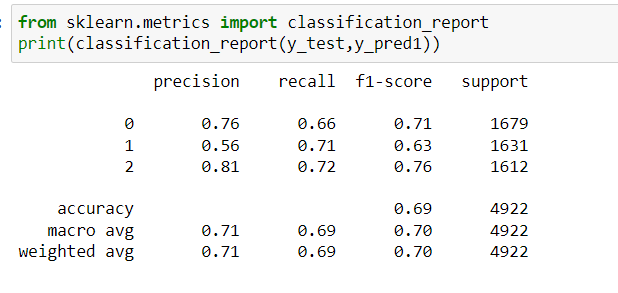

In [52]:
y_pred1[0]

1

In [53]:
X_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [54]:
import matplotlib.pyplot as plt

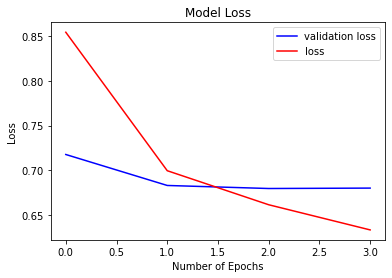

In [55]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(hist.history['val_loss'], color='b', label="validation loss")
plt.plot(hist.history['loss'], color='red', label="loss")
plt.title("Model Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

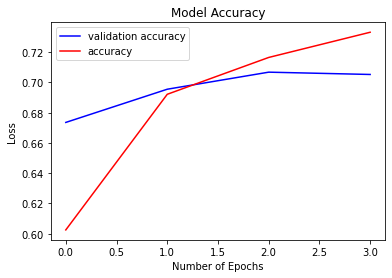

In [56]:
plt.plot(hist.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(hist.history['accuracy'], color='red', label="accuracy")
plt.title("Model Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()